In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")
from sklearn import datasets

In [7]:
iris = datasets.load_iris()

In [11]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
species = iris.target

In [14]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data["species"] = species
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
data.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

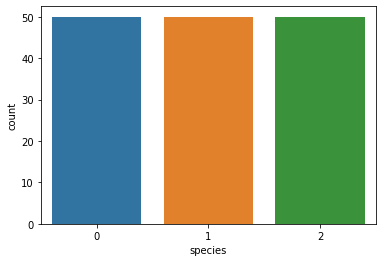

In [16]:
sns.countplot(data.species)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
lore = LogisticRegression()

In [19]:
features = data.drop("species", axis = 1)
lables = data.species

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, lables, test_size = 0.2, random_state = 2)

In [21]:
lore.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = lore.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [29]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  7]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [25]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [39]:
print(precision_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="weighted"))
print(recall_score(y_test, y_pred, average = "macro"))
print(recall_score(y_test, y_pred, average = "weighted"))

0.9166666666666666
0.9333333333333333
0.9166666666666666
0.9333333333333333
